In [1]:
import sqlite3
import matplotlib.pyplot as plt

conn = sqlite3.connect('./data.db')
c = conn.cursor()

In [2]:
c.execute('select release_year, release_month, count(1) from rtb_square_news group by release_year, release_month')

results = c.fetchall()

for result in results:
    print("year: " + str(result[0]) + "| " + "month: " + str(result[1]) + "| " + "count: " + str(result[2]))

year: 2016| month: 1| count: 55
year: 2016| month: 2| count: 62
year: 2016| month: 3| count: 83
year: 2016| month: 4| count: 65
year: 2016| month: 5| count: 66
year: 2016| month: 6| count: 85
year: 2016| month: 7| count: 75
year: 2016| month: 8| count: 68
year: 2016| month: 9| count: 76
year: 2016| month: 10| count: 64
year: 2016| month: 11| count: 81
year: 2016| month: 12| count: 65
year: 2017| month: 1| count: 52
year: 2017| month: 2| count: 75
year: 2017| month: 3| count: 83
year: 2017| month: 4| count: 68
year: 2017| month: 5| count: 71
year: 2017| month: 6| count: 102
year: 2017| month: 7| count: 95
year: 2017| month: 8| count: 80
year: 2017| month: 9| count: 91
year: 2017| month: 10| count: 106
year: 2017| month: 11| count: 78
year: 2017| month: 12| count: 73
year: 2018| month: 1| count: 67
year: 2018| month: 2| count: 76
year: 2018| month: 3| count: 78
year: 2018| month: 4| count: 62
year: 2018| month: 5| count: 64
year: 2018| month: 6| count: 97
year: 2018| month: 7| count: 73


In [3]:
c.execute('select id, release_year, key_words from rtb_square_news')

keywors = {}
results = c.fetchall()
for item in results:
    if item[2] != '':
        keywors.setdefault(item[1], [])
        keywors[item[1]] += (item[2].split('/'))


Top 10 key words in 2019:
サイバーエージェント    46
電通            40
動画広告          23
DAC           22
博報堂           17
CCI           15
ヤフー           14
Supership     14
オプト           13
DMP           13
dtype: int64


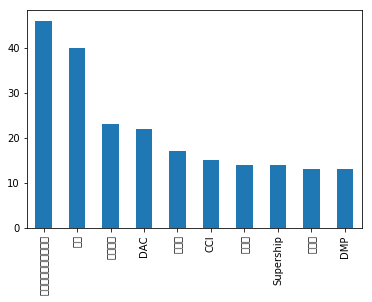

In [4]:
import pandas as pd
print("Top 10 key words in 2019:")
top10_list_2019 = pd.value_counts(keywors[2019])[0:10] 
print(top10_list_2019)


top10_list_2019.plot.bar()
plt.show()

Top 10 key words in 2018:
サイバーエージェント           83
電通                   54
DAC                  39
オプト                  29
LINE                 23
Supership            22
ソネット・メディア・ネットワークス    20
買収                   19
CCI                  18
AI                   17
dtype: int64


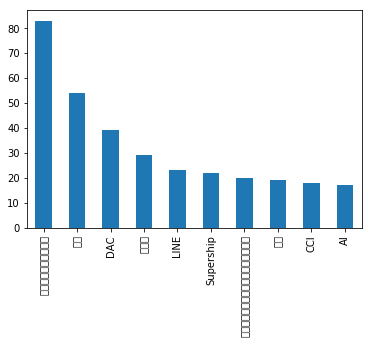

In [5]:
print("Top 10 key words in 2018:")
top10_list_2018 = pd.value_counts(keywors[2018])[0:10]

print(top10_list_2018)
top10_list_2018.plot.bar()
plt.show()

Top 10 key words in 2017:
動画広告          95
サイバーエージェント    94
電通            68
DAC           43
LINE          42
オプト           38
Supership     31
買収            29
博報堂           25
Criteo        23
dtype: int64


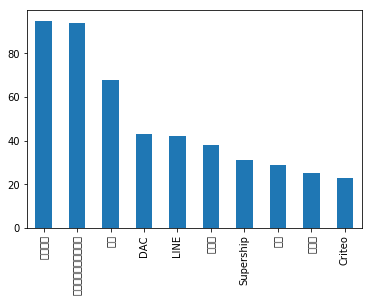

In [6]:
print("Top 10 key words in 2017:")
top10_list_2017 = pd.value_counts(keywors[2017])[0:10]

print(top10_list_2017)
top10_list_2017.plot.bar()
plt.show()


Top 10 key words in 2016:
電通                   52
サイバーエージェント           51
DAC                  35
Facebook             31
動画広告                 30
LINE                 30
買収                   29
Google               25
ソネット・メディア・ネットワークス    21
マイクロアド               18
dtype: int64


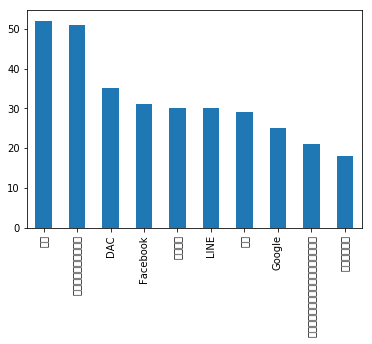

In [7]:
print("Top 10 key words in 2016:")
top10_list_2016 = pd.value_counts(keywors[2016])[0:10]

print(top10_list_2016)
top10_list_2016.plot.bar()
plt.show()


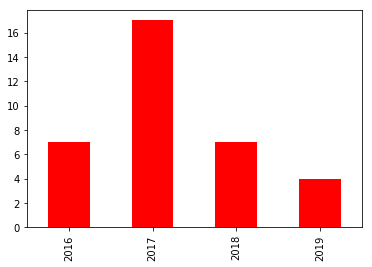

In [8]:
count_every_year = {}
for year in range(2016, 2020):
    key_words_num = pd.value_counts(keywors[year])['フリークアウト']
    count_every_year[year] = key_words_num
result = pd.Series(data = count_every_year)
result.plot.bar(color='r')
plt.show()

In [9]:
c.execute('select id, title, release_year, key_words from rtb_square_news')
results = c.fetchall()


In [10]:
results_with_key_words_list = []
for item in results:
    item_list = list(item[0:3])
    if item[3] != '':
        item_list.append(item[3].split('/'))
    else:
        item_list.append([])
    results_with_key_words_list.append(item_list)

In [11]:
for item in results_with_key_words_list:
    if item[3]:
        if 'フリークアウト' in item[3]:
            print('release year: ' + str(item[2]) + '| title: ' + item[1] + '| key_words: ' + "/".join(item[3]))

release year: 2019| title: Glossom、フリークアウトとの協業によりオーディエンスデータを活用したターゲティング広告「AdCorsa Native Ads」を提供開始| key_words: AdCorsa Native Ads/Glossom/グリー/フリークアウト
release year: 2019| title: フリークアウトグループ、インド発動画向けコンテクストマッチ広告を提供するSilverPushを関連子会社化| key_words: SilverPush/インド/フリークアウト
release year: 2019| title: フリークアウトグループ、アプリビジネス特化型の専門商社「本田商事株式会社」を設立| key_words: フリークアウト/本田商事
release year: 2019| title: フリークアウトグループ、タイ・ベトナムにて最大級の女性メディアを運営するSpice Lab Pte.Ltd.を買収| key_words: Spice Lab/フリークアウト
release year: 2018| title: フリークアウト、アプリエンゲージメントプラットフォーム「LayApp」提供開始| key_words: LayApp/フリークアウト
release year: 2018| title: フリークアウトグループ、国内・海外広告事業の統合| key_words: FreakOut Pte. Ltd/フリークアウト/フリークアウトグループ
release year: 2018| title: フリークアウトグループ、クロスボーダーマーケティング事業を強化| key_words: Rigoletto/Ultra FreakOut/クロスボーダーマーケティング/フリークアウト
release year: 2018| title: フリークアウト、ジオマーケティングプロダクト「ASE」を 電子チラシサービス「Shufoo!」に提供開始| key_words: ASE/Shufoo/フリークアウト/位置情報
release year: 2018| title: フリークアウトグループ、中国「上海惊点广告有限公司」を設立| key_words: フリークアウト/中国
release year: 2